In [26]:
#Activity 1
!pip install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("WejoDataAnalysis") \
    .getOrCreate()

In [27]:
# Load the JSON file into RDD
rdd = spark.sparkContext.textFile("wejo.json")

In [28]:
# 5. Inspect first few rows
rdd.take(5)

['{"dataPointId":"02d77c7e-1ac8-45bc-978f-7c3855f5ff9b","journeyId":"2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc","capturedTimestamp":"2023-04-12T19:00:04.000-0500","location":{"latitude":42.497317,"longitude":-90.740595,"geohash":"9zx3z0","postalCode":"52002","regionCode":"IA","countryCode":"US"},"metrics":{"speed":38.01,"heading":359.0},"vehicle":{"wejoVehicleTypeId":8905611058720503136,"status":{"ignitionStatus":"MID_JOURNEY"}}}',
 '{"dataPointId":"03fde858-5922-446a-b68a-00167b866c6e","journeyId":"1183a6bfb3178ba00a4a8585aca72db2d4e689ad","capturedTimestamp":"2023-04-12T19:00:21.000-0500","location":{"latitude":41.658504,"longitude":-93.500216,"geohash":"9zmsbr","postalCode":"50009","regionCode":"IA","countryCode":"US"},"metrics":{"speed":41.47,"heading":90.0},"vehicle":{"wejoVehicleTypeId":-5486746399762838414,"status":{"ignitionStatus":"MID_JOURNEY"}}}',
 '{"dataPointId":"04ce2a2c-d0fd-4197-9416-9324c9a5106c","journeyId":"1c96529d9ccf86042ca98744b3f3b710c247b67d","capturedTimestamp"

In [70]:
# 6. Parse JSON Strings into Python Dictionaries
import json
rdd_dict = rdd.map(lambda x: json.loads(x))

In [73]:
# 7. Extract Key Information (latitude, longitude, speed)
rdd_extracted = rdd_dict.map(lambda x: (x.get('journeyId'), x.get('latitude'), x.get('longitude'), x.get('speed')))

In [80]:
# 8 & 9. Filter Data Points with Speed > 30 mph
rdd_filtered = rdd_extracted.filter(lambda x: x[3] is not None and x[3] > 30)
count_speed_above_30 = rdd_filtered.count()
print(f"Number of data points with speed > 30 mph: {count_speed_above_30}")

Number of data points with speed > 30 mph: 0


In [75]:
# 10. Collect and Display Filtered Data Points
filtered_data = rdd_filtered.collect()
for data in filtered_data[:5]:  # Display the first 5 filtered data points
    print(data)

In [76]:
# 11. Plot the filtered data using matplotlib
import matplotlib.pyplot as plt

In [77]:
# Convert the filtered RDD to a list for plotting
if filtered_data:
  journeyId, latitude, longitude, speed = zip(*filtered_data)

In [78]:
# Create scatter plot for latitude vs longitude
    plt.scatter(longitude, latitude, c=speed, cmap='viridis', s=10)
    plt.colorbar(label='Speed (mph)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Filtered Data Points with Speed > 30 mph')
    plt.show()
    print(f"Number of data points with speed > 30 mph: {count_speed_above_30}")
else:
    print("No data points found with speed > 30 mph. Cannot plot.")

IndentationError: unexpected indent (<ipython-input-78-76e351a132a1>, line 2)

In [5]:
#Activity 2
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
!pip install Pillow==9.5.0

In [6]:
df = pd.read_csv('/content/apple_stock.csv')
print(df.head())

         Date        Open        High         Low       Close     Volume  \
0  2010-01-04  213.429998  214.499996  212.380001  214.009998  123432400   
1  2010-01-05  214.599998  215.589994  213.249994  214.379993  150476200   
2  2010-01-06  214.379993  215.230000  210.750004  210.969995  138040000   
3  2010-01-07  211.750000  212.000006  209.050005  210.580000  119282800   
4  2010-01-08  210.299994  212.000006  209.060005  211.980005  111902700   

   Adj Close  
0  27.727039  
1  27.774976  
2  27.333178  
3  27.282650  
4  27.464034  


In [8]:
!pip install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("My Spark Application").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=db1f57be8bd7704d44a3df0d1172caa057a6efa3710a253bb1aefabeb7fc1829
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [9]:
#Showing 20 rows
df = spark.read.csv('/content/apple_stock.csv', header=True, inferSchema=True)
df.show(20)

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [10]:
#Print Schema
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [11]:
#Showing number of rows in dataframe
df.count()

1762

In [12]:
df.describe().show()

+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|summary|              Open|              High|               Low|            Close|             Volume|         Adj Close|
+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|  count|              1762|              1762|              1762|             1762|               1762|              1762|
|   mean| 313.0763111589103| 315.9112880164581| 309.8282405079457|312.9270656379113|9.422577587968218E7| 75.00174115607275|
| stddev|185.29946803981522|186.89817686485767|183.38391664371008|185.1471036170943|6.020518776592709E7| 28.57492972179906|
|    min|              90.0|         90.699997|         89.470001|        90.279999|           11475900|         24.881912|
|    max|        702.409988|        705.070023|        699.569977|       702.100021|          470249500|127.96609099999999|
+-------

In [13]:
df.select("Date", "Open", "Close", "Volume").show()

+----------+------------------+------------------+---------+
|      Date|              Open|             Close|   Volume|
+----------+------------------+------------------+---------+
|2010-01-04|        213.429998|        214.009998|123432400|
|2010-01-05|        214.599998|        214.379993|150476200|
|2010-01-06|        214.379993|        210.969995|138040000|
|2010-01-07|            211.75|            210.58|119282800|
|2010-01-08|        210.299994|211.98000499999998|111902700|
|2010-01-11|212.79999700000002|210.11000299999998|115557400|
|2010-01-12|209.18999499999998|        207.720001|148614900|
|2010-01-13|        207.870005|        210.650002|151473000|
|2010-01-14|210.11000299999998|            209.43|108223500|
|2010-01-15|210.92999500000002|            205.93|148516900|
|2010-01-19|        208.330002|        215.039995|182501900|
|2010-01-20|        214.910006|            211.73|153038200|
|2010-01-21|        212.079994|        208.069996|152038600|
|2010-01-22|206.78000600

In [14]:
#Calculating Daily Price Change
df_spark = df
from pyspark.sql.functions import col, round

# Select key columns: ("Date", "Open", "Close", "Volume")
selected_df = df_spark.select("Date", "Open", "Close", "Volume")

# Step 7: Calculate Daily Price Change (Close - Open)
selected_df = selected_df.withColumn("Daily_Price_Change", round(col("Close") - col("Open"), 2))

# Step 8: Calculate Average Daily Volume
average_volume = selected_df.select("Volume").groupBy().avg("Volume").collect()[0][0]
print(f"Average Daily Volume: {average_volume}")

# Step 9: Find Maximum and Minimum Closing Prices
max_close = selected_df.agg({"Close": "max"}).collect()[0][0]
min_close = selected_df.agg({"Close": "min"}).collect()[0][0]
print(f"Maximum Closing Price: {max_close}")
print(f"Minimum Closing Price: {min_close}")

# Display results
selected_df.show(5)


Average Daily Volume: 94225775.87968218
Maximum Closing Price: 702.100021
Minimum Closing Price: 90.279999
+----------+----------+------------------+---------+------------------+
|      Date|      Open|             Close|   Volume|Daily_Price_Change|
+----------+----------+------------------+---------+------------------+
|2010-01-04|213.429998|        214.009998|123432400|              0.58|
|2010-01-05|214.599998|        214.379993|150476200|             -0.22|
|2010-01-06|214.379993|        210.969995|138040000|             -3.41|
|2010-01-07|    211.75|            210.58|119282800|             -1.17|
|2010-01-08|210.299994|211.98000499999998|111902700|              1.68|
+----------+----------+------------------+---------+------------------+
only showing top 5 rows



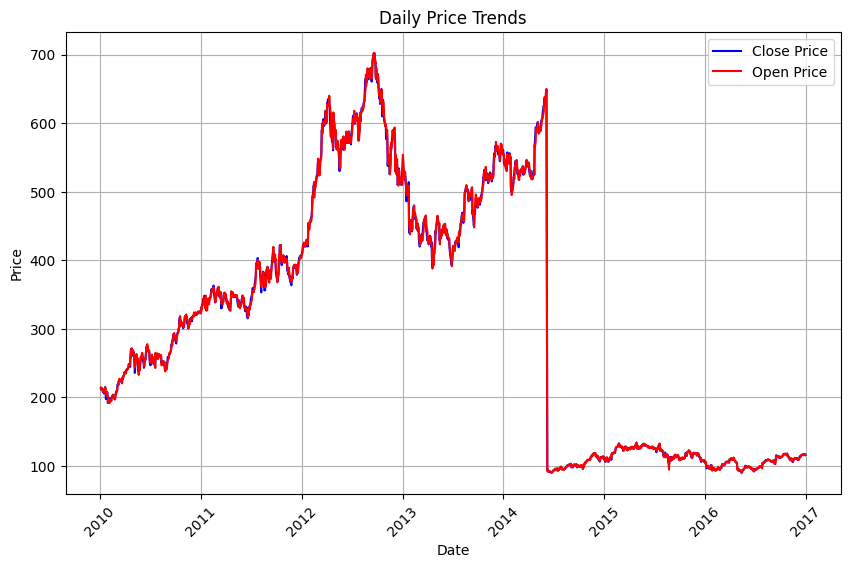

In [15]:
#Calculate average daily volume
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame for plotting
pandas_df = selected_df.toPandas()

# Convert 'Date' to datetime
pandas_df['Date'] = pd.to_datetime(pandas_df['Date'])

# Plot the daily price trends
plt.figure(figsize=(10, 6))
plt.plot(pandas_df['Date'], pandas_df['Close'], label='Close Price', color='b')
plt.plot(pandas_df['Date'], pandas_df['Open'], label='Open Price', color='r')

plt.title('Daily Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

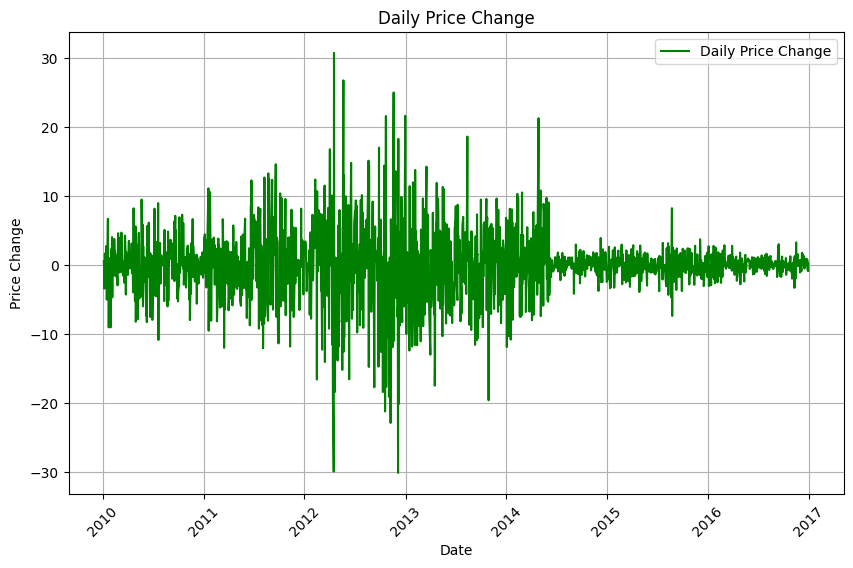

In [16]:
# Load CSV file into pandas DataFrame first
file_path = '/content/apple_stock.csv'
df = pd.read_csv(file_path, on_bad_lines='skip')

# Calculate Daily Price Change
df['Daily_Price_Change'] = df['Close'] - df['Open']

# Convert 'Date' to datetime for better plotting
df['Date'] = pd.to_datetime(df['Date'])

# Plot the daily price change
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Daily_Price_Change'], label='Daily Price Change', color='g')

plt.title('Daily Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [17]:
#Activity 3
#Importing function
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, DoubleType
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
#Creating the Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MySparkApp").getOrCreate()

In [19]:
#Loading file using PySpark
df1 = spark.read.csv('/content/ID_31_data.csv', header=True, inferSchema=True)
df1.show()

+-------------------+---------+----------+------------------+-------+--------+---+----+--------+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+
|  capturedtimestamp| latitude| longitude|             speed|geohash|   month|day|hour|      ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             Time26|         date_ti

In [ ]:
# 2. Initialize Spark session
spark = SparkSession.builder \
    .appName("ID_31_data_analysis") \
    .getOrCreate()

In [ ]:
# 4. Load CSV File Using PySpark
file_path = "/content/ID_31_data.csv"  # Adjust path if needed
df1 = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
# 5. Ensure 'speed' is of type Double and 'ID' is Integer
df1 = df.withColumn("speed", df["speed"].cast(DoubleType())) \
       .withColumn("ID", df["ID"].cast(IntegerType()))

In [ ]:
# 6. Convert capturedtimestamp to Spark timestamp type
df1 = df.withColumn("capturedtimestamp", F.to_timestamp("capturedtimestamp"))

In [ ]:
# 7. Extract hour and day of the week for further analysis
df1 = df.withColumn("hour", F.hour("capturedtimestamp")) \
       .withColumn("day_of_week", F.dayofweek("capturedtimestamp"))

In [ ]:
# 8. Compute the required statistics using PySpark functions
speed_limit = 45  # Assuming a speed limit, adjust as needed

In [ ]:
# Fractions over the limit
df1 = df.withColumn("fraction_5_over_limit", F.when(df["speed"] > (speed_limit + 5), 1).otherwise(0)) \
       .withColumn("fraction_10_over_limit", F.when(df["speed"] > (speed_limit + 10), 1).otherwise(0)) \
       .withColumn("fraction_20_over_limit", F.when(df["speed"] > (speed_limit + 20), 1).otherwise(0))

In [ ]:
# 9. Log the statistics
import logging
logging.basicConfig(level=logging.INFO)
logging.info(f"Total records: {df.count()}")
logging.info(f"Records 5 over limit: {df.filter(df['fraction_5_over_limit'] == 1).count()}")
logging.info(f"Records 10 over limit: {df.filter(df['fraction_10_over_limit'] == 1).count()}")
logging.info(f"Records 20 over limit: {df.filter(df['fraction_20_over_limit'] == 1).count()}")

In [ ]:
# 10. Calculate 50th percentile (median) speed per journey and fractions over limits
median_speed_df = df.groupBy("Journey_Direction").agg(
    F.expr('percentile_approx(speed, 0.5)').alias('median_speed'),
    F.avg("fraction_5_over_limit").alias("avg_fraction_5_over_limit"),
    F.avg("fraction_10_over_limit").alias("avg_fraction_10_over_limit"),
    F.avg("fraction_20_over_limit").alias("avg_fraction_20_over_limit")
)

In [ ]:
# 11. Print all statistics
median_speed_df.show()

+-----------------+------------+-------------------------+--------------------------+--------------------------+
|Journey_Direction|median_speed|avg_fraction_5_over_limit|avg_fraction_10_over_limit|avg_fraction_20_over_limit|
+-----------------+------------+-------------------------+--------------------------+--------------------------+
|   Same Direction|   56.544761|       0.6379348782634203|        0.5706776180698152|      0.019125843355822823|
+-----------------+------------+-------------------------+--------------------------+--------------------------+



In [ ]:
# 12. Convert to Pandas DataFrame for plotting
df_pandas = df.toPandas()

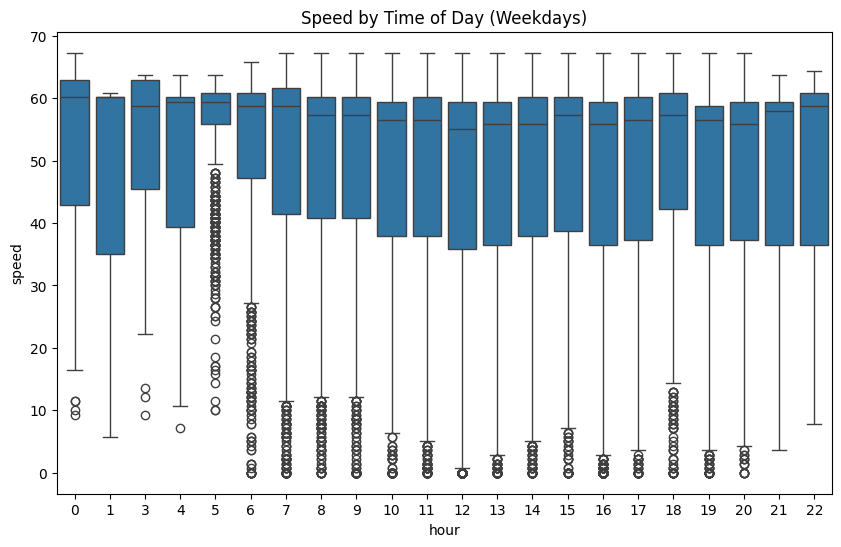

In [ ]:
# 13. Use Boxplots to plot Speed by Time of Day (Weekdays)
weekday_df = df_pandas[df_pandas["day_of_week"] < 6]  # Monday to Friday
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='speed', data=weekday_df)
plt.title('Speed by Time of Day (Weekdays)')
plt.show()

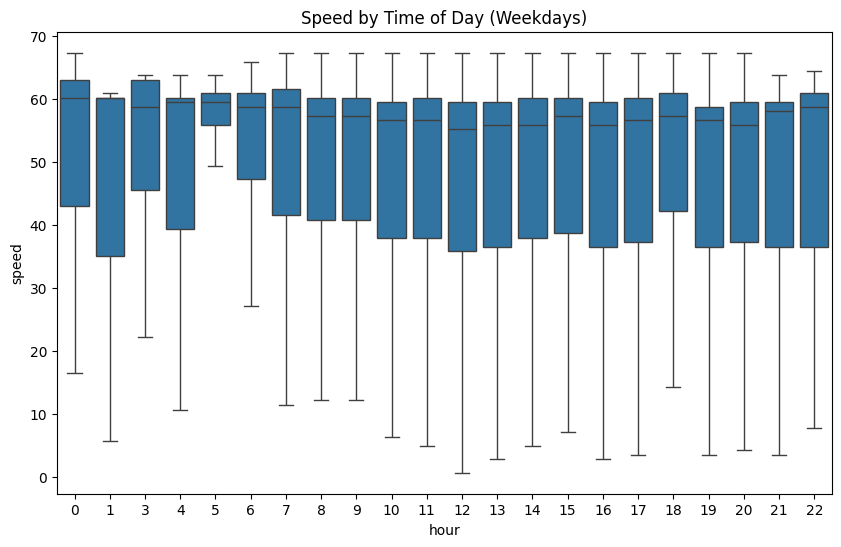

In [ ]:
#Hide outliers
weekday_df = df_pandas[df_pandas["day_of_week"] < 6]  # Monday to Friday
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='speed', data=weekday_df, showfliers=False)
plt.title('Speed by Time of Day (Weekdays)')
plt.show()

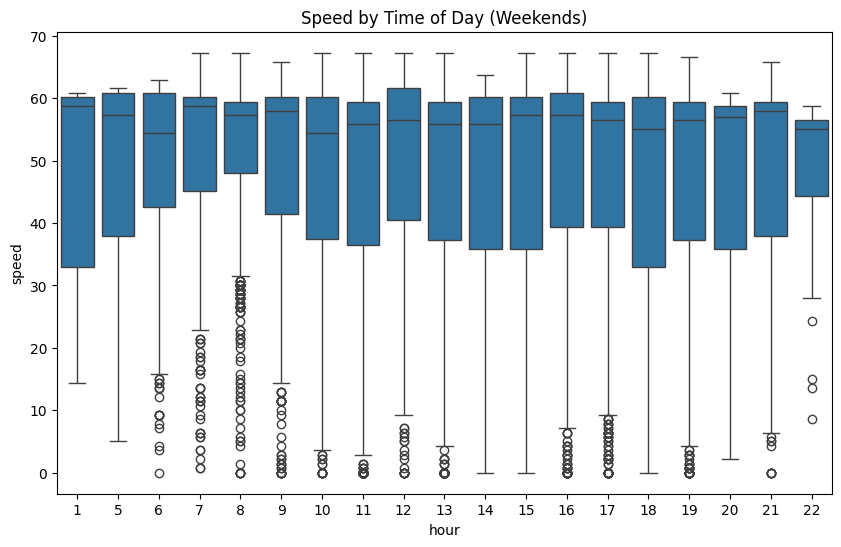

In [ ]:
# 14. Use Boxplots to plot Speed by Time of Day (Weekends)
weekend_df = df_pandas[df_pandas["day_of_week"] >= 6]  # Saturday and Sunday
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='speed', data=weekend_df)
plt.title('Speed by Time of Day (Weekends)')
plt.show()

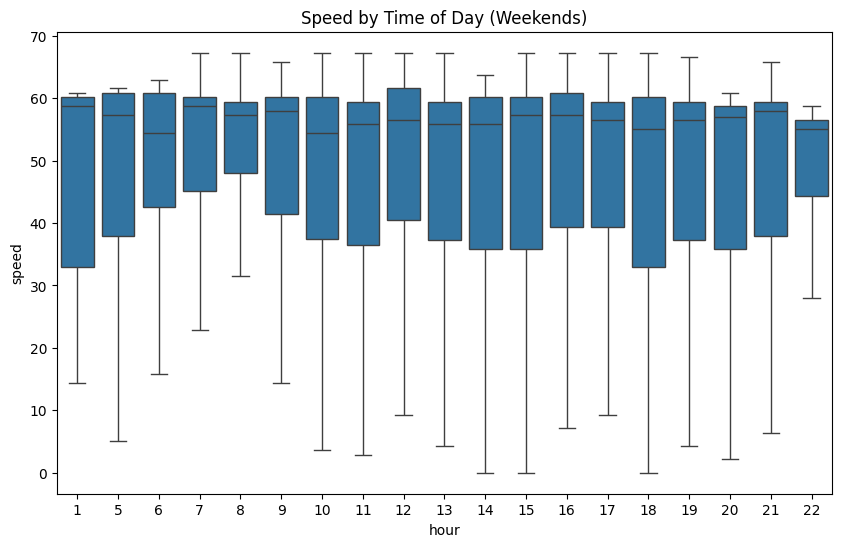

In [ ]:
#Hide outliers
weekend_df = df_pandas[df_pandas["day_of_week"] >= 6]  # Saturday and Sunday
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='speed', data=weekend_df, showfliers=False)
plt.title('Speed by Time of Day (Weekends)')
plt.show()